### Import Packages

In [38]:
# tensorflow
import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import KFold

print("Packages Imported")

Packages Imported


### Output Path

In [39]:
cwd = os.getcwd()
out_subpath = "output_final"

print("Output Path Set")

Output Path Set


### Load Data

In [40]:
# LOAD DATA
print("\nLoading Files")
data_raw = pd.read_csv('output_sir_monte_carlo_train.csv', delimiter=',', header=None)
data_train = data_raw.to_numpy()
print("Training File Loaded")

print("\nFile Size")
print(data_train.shape)

indx_p_start = np.where(data_train[0] == 666)[0][0]
indx_i_start = np.where(data_train[0] == 777)[0][0]
indx_end = np.where(data_train[0] == 999)[0][0]


Loading Files
Training File Loaded

File Size
(625000, 372)


### Select and Normalise Data

In [41]:
n_days = 120

param_start = indx_p_start + 1
param_end = indx_i_start - indx_p_start

i_start = param_end + 1
i_end = i_start + n_days

y_data = data_train[:, param_start:param_end] # actual parameters value
y_data = np.delete(y_data, 2, axis=-1) # remove gamma info
x_raw = data_train[:, i_start:i_end]

# NORMALISE DATA
N = 4500000
x_data = x_raw / N

print("Raw Input/Output Data Size:")
print(x_data.shape)
print(y_data.shape)

Raw Input/Output Data Size:
(625000, 120)
(625000, 2)


### Set Up K-Fold

In [48]:
n_fold = 5 # number of folds

tests = ["0 - Baseline",
         "1a - 8 Layers",
         "1b - 2 Layers",
         "2a - 128 Nodes",
         "2b - 32 Nodes",
         "3a - Activation = Tanh",
         "3b - Activation = SeLU",
         "4a - Batch Size = 8",
         "4b - Batch Size = 64",
         "5a - Optimizer = RMSProp",
         "5b - Optimizer = NADAM"]

print("Number of Tests: {0}".format(len(tests)))
print()

for i in range(0, len(tests)):
    print("{0}".format(tests[i]))

Number of Tests: 11

0 - Baseline
1a - 8 Layers
1b - 2 Layers
2a - 128 Nodes
2b - 32 Nodes
3a - Activation = Tanh
3b - Activation = SeLU
4a - Batch Size = 8
4b - Batch Size = 64
5a - Optimizer = RMSProp
5b - Optimizer = NADAM


## Scenario 0 - Base Model

In [49]:
i_t = 0 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

0 - Baseline


### Run Model

In [51]:
MAE_test0 = []
MAPE_test0 = []

y_test_hat_out0 = []

history_out0 = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model0 = tf.keras.Sequential()
    model0.add(tf.keras.layers.Input((n, )))
    model0.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model0.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model0.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model0.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model0.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model0.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history0 = model0.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model0.predict(x_test, batch_size=n_batch)
    y_test_hat_out0.append(y_test_hat)

    history_out0.append(history0)

    test_loss, test_accuracy = model0.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test0.append(test_loss)
    MAPE_test0.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model0.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 904us/step - loss: 0.0121 - mean_absolute_percentage_error: 50.8933 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 14.8084
Epoch 2/20
15625/15625 [==============================] - 14s 911us/step - loss: 0.0027 - mean_absolute_percentage_error: 16.4058 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 15.0508
Epoch 3/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0023 - mean_absolute_percentage_error: 15.1515 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 15.2876
Epoch 4/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0022 - mean_absolute_percentage_error: 14.4206 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 15.6606
Epoch 5/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0021 - me

3907/3907 [==============================] - 2s 528us/step - loss: 0.0015 - mean_absolute_percentage_error: 12.7961
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\0 - Baseline\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 13s 804us/step - loss: 0.0127 - mean_absolute_percentage_error: 57.2995 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 15.8333
Epoch 2/20
15625/15625 [==============================] - 13s 832us/step - loss: 0.0027 - mean_absolute_percentage_error: 16.4044 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 18.4215
Epoch 3/20
15625/15625 [==============================] - 14s 876us/step - loss: 0.0023 - mean_absolute_percentage_error: 15.2714 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 16.4194
Epoch 

Epoch 18/20
15625/15625 [==============================] - 14s 916us/step - loss: 0.0016 - mean_absolute_percentage_error: 12.3454 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 13.0759
Epoch 19/20
15625/15625 [==============================] - 15s 968us/step - loss: 0.0016 - mean_absolute_percentage_error: 12.1698 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 11.4783
Epoch 20/20
3907/3907 [==============================] - 2s 544us/step - loss: 0.0015 - mean_absolute_percentage_error: 12.2995
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\0 - Baseline\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0124 - mean_absolute_percentage_error: 54.1025 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 14

### Plot Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001608 	 14.237236
2 		 0.001529 	 12.796133
3 		 0.001667 	 12.163980
4 		 0.001509 	 12.299477
5 		 0.001568 	 13.212245

Mean 		 0.001576 	 12.941814
Median 		 0.001568 	 12.796133


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 23.91 		 15.77
2 		 15.87 		 15.77
3 		 14.96 		 14.23
4 		 14.39 		 15.44
5 		 13.98 		 13.11
6 		 13.7 		 13.54
7 		 13.47 		 13.21
8 		 13.32 		 12.96
9 		 13.16 		 13.31
10 		 13.05 		 12.91
11 		 12.91 		 12.73
12 		 12.85 		 12.04
13 		 12.75 		 12.67
14 		 12.7 		 13.42
15 		 12.63 		 12.1
16 		 12.56 		 13.39
17 		 12.51 		 12.3
18 		 12.45 		 12.83
19 		 12.41 		 11.96
20 		 12.37 		 12.94


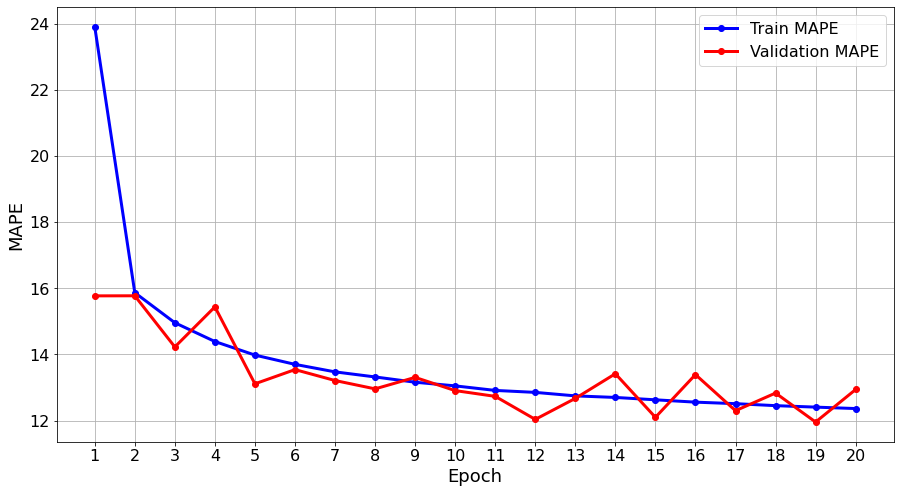

In [52]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test0[i], MAPE_test0[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test0), np.average(MAPE_test0)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test0), np.median(MAPE_test0)))

train_mape_average0 = []
test_mape_average0 = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out0[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average0.append(train_mape)

    test_mape_average_i = [history_out0[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average0.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average0, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average0, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 1a - 8 Layers

In [53]:
i_t = 1 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

1a - 8 Layers


### Run Model

In [54]:
MAE_test1a = []
MAPE_test1a = []

y_test_hat_out1a = []

history_out1a = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model1a = tf.keras.Sequential()
    model1a.add(tf.keras.layers.Input((n, )))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1a.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model1a.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history1a = model1a.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model1a.predict(x_test, batch_size=n_batch)
    y_test_hat_out1a.append(y_test_hat)

    history_out1a.append(history1a)

    test_loss, test_accuracy = model1a.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test1a.append(test_loss)
    MAPE_test1a.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model1a.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 19s 1ms/step - loss: 0.0113 - mean_absolute_percentage_error: 44.1394 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 18.0792
Epoch 2/20
15625/15625 [==============================] - 19s 1ms/step - loss: 0.0029 - mean_absolute_percentage_error: 15.8585 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 14.4627
Epoch 3/20
15625/15625 [==============================] - 20s 1ms/step - loss: 0.0025 - mean_absolute_percentage_error: 14.8324 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 13.5535
Epoch 4/20
15625/15625 [==============================] - 23s 1ms/step - loss: 0.0023 - mean_absolute_percentage_error: 14.3942 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 12.8626
Epoch 5/20
15625/15625 [==============================] - 21s 1ms/step - loss: 0.0022 - mean_a

3907/3907 [==============================] - 2s 603us/step - loss: 0.0018 - mean_absolute_percentage_error: 13.5196
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\1a - 8 Layers\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 20s 1ms/step - loss: 0.0109 - mean_absolute_percentage_error: 41.7712 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 18.0696
Epoch 2/20
15625/15625 [==============================] - 18s 1ms/step - loss: 0.0028 - mean_absolute_percentage_error: 15.2866 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 15.0759
Epoch 3/20
15625/15625 [==============================] - 19s 1ms/step - loss: 0.0024 - mean_absolute_percentage_error: 14.7044 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 15.0689
Epoch 4/20


15625/15625 [==============================] - 16s 1ms/step - loss: 0.0017 - mean_absolute_percentage_error: 12.6242 - val_loss: 0.0017 - val_mean_absolute_percentage_error: 11.8264
Epoch 19/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0017 - mean_absolute_percentage_error: 12.7682 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 12.1506
Epoch 20/20
3907/3907 [==============================] - 2s 526us/step - loss: 0.0020 - mean_absolute_percentage_error: 11.7346
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\1a - 8 Layers\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0105 - mean_absolute_percentage_error: 42.3079 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 15.8571
Epoch 2/2

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001947 	 12.013682
2 		 0.001797 	 13.519555
3 		 0.001739 	 11.329124
4 		 0.001959 	 11.734634
5 		 0.001583 	 11.345537

Mean 		 0.001805 	 11.988507
Median 		 0.001797 	 11.734634


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 22.04 		 17.19
2 		 15.35 		 15.25
3 		 14.6 		 14.51
4 		 14.22 		 14.02
5 		 13.92 		 14.73
6 		 13.73 		 13.6
7 		 13.58 		 13.71
8 		 13.42 		 12.78
9 		 13.29 		 12.75
10 		 13.17 		 12.85
11 		 13.1 		 13.16
12 		 13.0 		 13.36
13 		 12.96 		 13.06
14 		 12.88 		 15.04
15 		 12.8 		 13.0
16 		 12.72 		 12.47
17 		 12.69 		 13.17
18 		 12.62 		 12.35
19 		 12.56 		 11.81
20 		 12.52 		 11.99


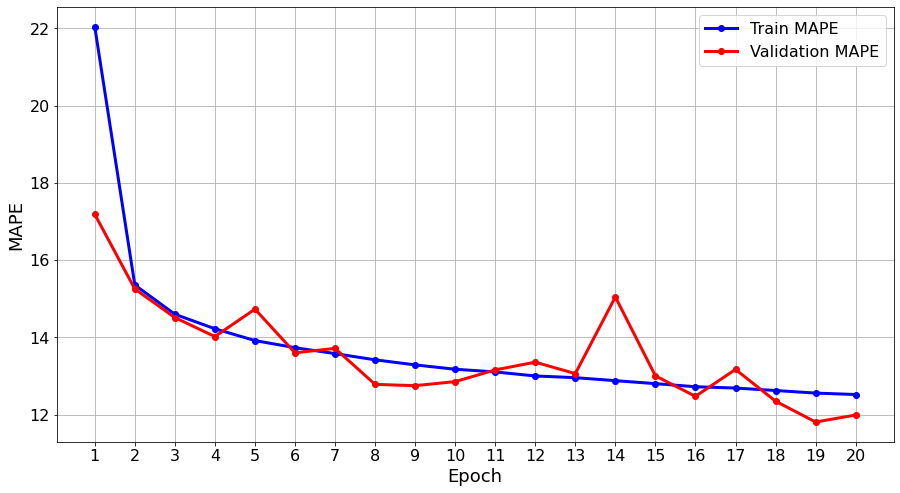

In [55]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test1a[i], MAPE_test1a[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test1a), np.average(MAPE_test1a)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test1a), np.median(MAPE_test1a)))

train_mape_average1a = []
test_mape_average1a = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out1a[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average1a.append(train_mape)

    test_mape_average_i = [history_out1a[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average1a.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average1a, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average1a, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 1b - 2 Layers

In [56]:
i_t = 2 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

1b - 2 Layers


### Run Model

In [57]:
MAE_test1b = []
MAPE_test1b = []

y_test_hat_out1b = []

history_out1b = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model1b = tf.keras.Sequential()
    model1b.add(tf.keras.layers.Input((n, )))
    model1b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model1b.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model1b.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history1b = model1b.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model1b.predict(x_test, batch_size=n_batch)
    y_test_hat_out1b.append(y_test_hat)

    history_out1b.append(history1b)

    test_loss, test_accuracy = model1b.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test1b.append(test_loss)
    MAPE_test1b.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model1b.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 13s 822us/step - loss: 0.0187 - mean_absolute_percentage_error: 81.9469 - val_loss: 0.0033 - val_mean_absolute_percentage_error: 19.6971
Epoch 2/20
15625/15625 [==============================] - 15s 929us/step - loss: 0.0030 - mean_absolute_percentage_error: 19.7154 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 17.3475
Epoch 3/20
15625/15625 [==============================] - 13s 823us/step - loss: 0.0026 - mean_absolute_percentage_error: 17.9281 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 16.5035
Epoch 4/20
15625/15625 [==============================] - 14s 876us/step - loss: 0.0024 - mean_absolute_percentage_error: 16.7020 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 15.8825
Epoch 5/20
15625/15625 [==============================] - 13s 840us/step - loss: 0.002

3907/3907 [==============================] - 2s 546us/step - loss: 0.0016 - mean_absolute_percentage_error: 12.3007
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\1b - 2 Layers\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 14s 849us/step - loss: 0.0176 - mean_absolute_percentage_error: 76.3756 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 20.7423
Epoch 2/20
15625/15625 [==============================] - 13s 808us/step - loss: 0.0030 - mean_absolute_percentage_error: 20.1820 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 17.6808
Epoch 3/20
15625/15625 [==============================] - 13s 816us/step - loss: 0.0026 - mean_absolute_percentage_error: 17.5216 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 17.1009
Epoch

Epoch 18/20
15625/15625 [==============================] - 12s 787us/step - loss: 0.0017 - mean_absolute_percentage_error: 13.4467 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 12.2955
Epoch 19/20
15625/15625 [==============================] - 12s 744us/step - loss: 0.0017 - mean_absolute_percentage_error: 13.4882 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 13.3165
Epoch 20/20
3907/3907 [==============================] - 2s 506us/step - loss: 0.0017 - mean_absolute_percentage_error: 13.1965
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\1b - 2 Layers\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 12s 773us/step - loss: 0.0169 - mean_absolute_percentage_error: 77.1530 - val_loss: 0.0031 - val_mean_absolute_percentage_error:

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001650 	 14.586592
2 		 0.001595 	 12.300708
3 		 0.001735 	 13.356216
4 		 0.001651 	 13.196546
5 		 0.001553 	 11.467947

Mean 		 0.001637 	 12.981602
Median 		 0.001650 	 13.196546


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 32.49 		 20.5
2 		 18.97 		 17.49
3 		 17.16 		 16.19
4 		 16.25 		 16.05
5 		 15.69 		 15.58
6 		 15.27 		 14.88
7 		 14.95 		 14.78
8 		 14.67 		 13.93
9 		 14.44 		 13.55
10 		 14.27 		 14.42
11 		 14.1 		 15.0
12 		 13.96 		 14.14
13 		 13.84 		 13.78
14 		 13.73 		 13.48
15 		 13.61 		 15.05
16 		 13.54 		 12.22
17 		 13.44 		 13.45
18 		 13.38 		 13.03
19 		 13.31 		 12.81
20 		 13.21 		 12.98


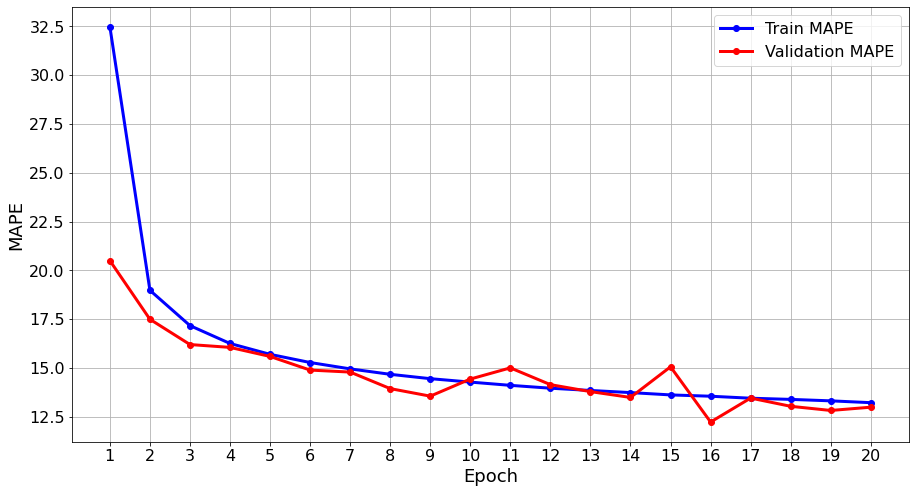

In [58]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test1b[i], MAPE_test1b[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test1b), np.average(MAPE_test1b)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test1b), np.median(MAPE_test1b)))

train_mape_average1b = []
test_mape_average1b = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out1b[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average1b.append(train_mape)

    test_mape_average_i = [history_out1b[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average1b.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average1b, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average1b, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 2a - 128 nodes

In [61]:
i_t = 3 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

2a - 128 Nodes


### Run Model

In [62]:
MAE_test2a = []
MAPE_test2a = []

y_test_hat_out2a = []

history_out2a = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model2a = tf.keras.Sequential()
    model2a.add(tf.keras.layers.Input((n, )))
    model2a.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model2a.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model2a.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model2a.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model2a.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model2a.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history2a = model2a.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model2a.predict(x_test, batch_size=n_batch)
    y_test_hat_out2a.append(y_test_hat)

    history_out2a.append(history2a)

    test_loss, test_accuracy = model2a.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test2a.append(test_loss)
    MAPE_test2a.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model2a.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 18s 1ms/step - loss: 0.0101 - mean_absolute_percentage_error: 41.3187 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 12.6360
Epoch 2/20
15625/15625 [==============================] - 18s 1ms/step - loss: 0.0026 - mean_absolute_percentage_error: 15.2446 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 16.3588
Epoch 3/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0023 - mean_absolute_percentage_error: 14.5907 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 11.5488
Epoch 4/20
15625/15625 [==============================] - 19s 1ms/step - loss: 0.0021 - mean_absolute_percentage_error: 13.9552 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 11.7711
Epoch 5/20
15625/15625 [==============================] - 21s 1ms/step - loss: 0.0020 - mean_a

3907/3907 [==============================] - 2s 573us/step - loss: 0.0014 - mean_absolute_percentage_error: 11.9248
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\2a - 128 Nodes\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0099 - mean_absolute_percentage_error: 41.4628 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 17.3297
Epoch 2/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0026 - mean_absolute_percentage_error: 15.6237 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 15.1346
Epoch 3/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0022 - mean_absolute_percentage_error: 14.4798 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 12.7611
Epoch 4/20

15625/15625 [==============================] - 16s 1ms/step - loss: 0.0016 - mean_absolute_percentage_error: 12.3893 - val_loss: 0.0017 - val_mean_absolute_percentage_error: 12.3960
Epoch 19/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0016 - mean_absolute_percentage_error: 12.3400 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 12.4454
Epoch 20/20
3907/3907 [==============================] - 2s 571us/step - loss: 0.0018 - mean_absolute_percentage_error: 12.8942
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\2a - 128 Nodes\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 21s 1ms/step - loss: 0.0101 - mean_absolute_percentage_error: 43.2426 - val_loss: 0.0030 - val_mean_absolute_percentage_error: 13.3709
Epoch 2/

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001599 	 11.488506
2 		 0.001363 	 11.924757
3 		 0.001604 	 11.886057
4 		 0.001775 	 12.894242
5 		 0.001435 	 11.742736

Mean 		 0.001555 	 11.987260
Median 		 0.001599 	 11.886057


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 21.32 		 14.52
2 		 15.28 		 14.93
3 		 14.46 		 13.45
4 		 14.06 		 13.31
5 		 13.77 		 14.34
6 		 13.52 		 12.97
7 		 13.38 		 13.42
8 		 13.23 		 14.85
9 		 13.12 		 12.58
10 		 12.99 		 12.47
11 		 12.89 		 13.16
12 		 12.82 		 13.0
13 		 12.72 		 13.08
14 		 12.66 		 12.44
15 		 12.61 		 12.6
16 		 12.55 		 13.38
17 		 12.52 		 12.01
18 		 12.46 		 12.13
19 		 12.41 		 12.04
20 		 12.35 		 11.99


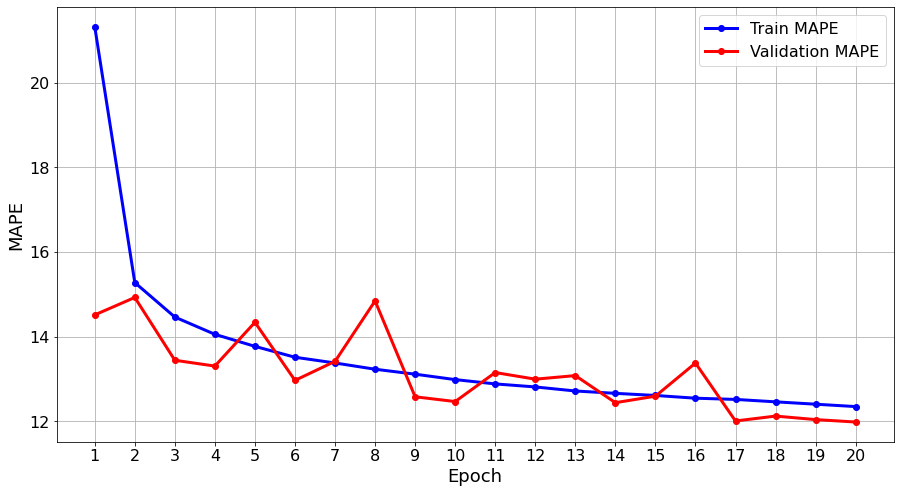

In [63]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test2a[i], MAPE_test2a[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test2a), np.average(MAPE_test2a)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test2a), np.median(MAPE_test2a)))

train_mape_average2a = []
test_mape_average2a = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out2a[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average2a.append(train_mape)

    test_mape_average_i = [history_out2a[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average2a.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average2a, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average2a, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 2b - 32 nodes

In [65]:
i_t = 4 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

2b - 32 Nodes


### Run Model

In [66]:
MAE_test2b = []
MAPE_test2b = []

y_test_hat_out2b = []

history_out2b = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model2b = tf.keras.Sequential()
    model2b.add(tf.keras.layers.Input((n, )))
    model2b.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
    model2b.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
    model2b.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
    model2b.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
    model2b.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model2b.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history2b = model2b.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model2b.predict(x_test, batch_size=n_batch)
    y_test_hat_out2b.append(y_test_hat)

    history_out2b.append(history2b)

    test_loss, test_accuracy = model2b.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test2b.append(test_loss)
    MAPE_test2b.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model2b.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 14s 824us/step - loss: 0.0149 - mean_absolute_percentage_error: 64.8018 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 17.0028
Epoch 2/20
15625/15625 [==============================] - 13s 807us/step - loss: 0.0028 - mean_absolute_percentage_error: 17.5781 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 16.6531
Epoch 3/20
15625/15625 [==============================] - 14s 891us/step - loss: 0.0025 - mean_absolute_percentage_error: 16.4119 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 15.7790
Epoch 4/20
15625/15625 [==============================] - 12s 753us/step - loss: 0.0023 - mean_absolute_percentage_error: 15.6361 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 16.8288
Epoch 5/20
15625/15625 [==============================] - 12s 752us/step - loss: 0.002

3907/3907 [==============================] - 2s 474us/step - loss: 0.0018 - mean_absolute_percentage_error: 14.5735
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\2b - 32 Nodes\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 12s 764us/step - loss: 0.0159 - mean_absolute_percentage_error: 66.4332 - val_loss: 0.0032 - val_mean_absolute_percentage_error: 18.7481
Epoch 2/20
15625/15625 [==============================] - 12s 752us/step - loss: 0.0031 - mean_absolute_percentage_error: 18.1579 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 17.3766
Epoch 3/20
15625/15625 [==============================] - 12s 752us/step - loss: 0.0026 - mean_absolute_percentage_error: 16.3563 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 18.4996
Epoch

Epoch 18/20
15625/15625 [==============================] - 15s 979us/step - loss: 0.0018 - mean_absolute_percentage_error: 13.0603 - val_loss: 0.0017 - val_mean_absolute_percentage_error: 12.6281
Epoch 19/20
15625/15625 [==============================] - 16s 996us/step - loss: 0.0017 - mean_absolute_percentage_error: 12.5678 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 12.8084
Epoch 20/20
3907/3907 [==============================] - 3s 719us/step - loss: 0.0017 - mean_absolute_percentage_error: 11.5117
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\2b - 32 Nodes\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 909us/step - loss: 0.0167 - mean_absolute_percentage_error: 72.3904 - val_loss: 0.0033 - val_mean_absolute_percentage_error:

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001588 	 12.565154
2 		 0.001760 	 14.573492
3 		 0.001703 	 13.760220
4 		 0.001674 	 11.511663
5 		 0.002043 	 12.997779

Mean 		 0.001754 	 13.081662
Median 		 0.001703 	 12.997779


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 29.43 		 18.96
2 		 17.7 		 16.34
3 		 16.29 		 16.03
4 		 15.57 		 16.08
5 		 15.12 		 14.66
6 		 14.74 		 14.98
7 		 14.46 		 14.18
8 		 14.22 		 13.4
9 		 13.97 		 13.41
10 		 13.75 		 14.55
11 		 13.56 		 13.62
12 		 13.38 		 13.74
13 		 13.25 		 12.66
14 		 13.13 		 12.47
15 		 13.03 		 13.68
16 		 12.93 		 13.86
17 		 12.87 		 12.35
18 		 12.81 		 12.16
19 		 12.71 		 12.33
20 		 12.65 		 13.08


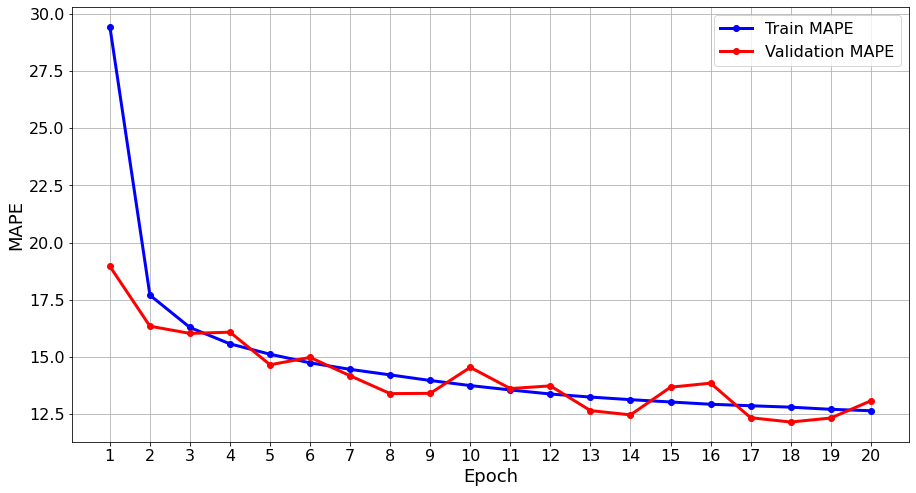

In [67]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test2b[i], MAPE_test2b[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test2b), np.average(MAPE_test2b)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test2b), np.median(MAPE_test2b)))

train_mape_average2b = []
test_mape_average2b = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out2b[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average2b.append(train_mape)

    test_mape_average_i = [history_out2b[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average2b.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average2b, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average2b, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 3a - Tanh Activation

In [68]:
i_t = 5 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

3a - Activation = Tanh


### Run Model

In [69]:
MAE_test3a = []
MAPE_test3a = []

y_test_hat_out3a = []

history_out3a = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model3a = tf.keras.Sequential()
    model3a.add(tf.keras.layers.Input((n, )))
    model3a.add(tf.keras.layers.Dense(64, activation=tf.nn.tanh))
    model3a.add(tf.keras.layers.Dense(64, activation=tf.nn.tanh))
    model3a.add(tf.keras.layers.Dense(64, activation=tf.nn.tanh))
    model3a.add(tf.keras.layers.Dense(64, activation=tf.nn.tanh))
    model3a.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model3a.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history3a = model3a.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model3a.predict(x_test, batch_size=n_batch)
    y_test_hat_out3a.append(y_test_hat)

    history_out3a.append(history3a)

    test_loss, test_accuracy = model3a.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test3a.append(test_loss)
    MAPE_test3a.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model3a.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0127 - mean_absolute_percentage_error: 45.5070 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 11.8298
Epoch 2/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0030 - mean_absolute_percentage_error: 16.0023 - val_loss: 0.0030 - val_mean_absolute_percentage_error: 16.8726
Epoch 3/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0027 - mean_absolute_percentage_error: 15.0484 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 15.7522
Epoch 4/20
15625/15625 [==============================] - 17s 1ms/step - loss: 0.0025 - mean_absolute_percentage_error: 14.4727 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 15.9663
Epoch 5/20
15625/15625 [==============================] - 15s 948us/step - loss: 0.0024 - mean

3907/3907 [==============================] - 2s 564us/step - loss: 0.0018 - mean_absolute_percentage_error: 12.5909
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\3a - Activation = Tanh\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 16s 993us/step - loss: 0.0134 - mean_absolute_percentage_error: 44.0588 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 16.6175
Epoch 2/20
15625/15625 [==============================] - 14s 905us/step - loss: 0.0030 - mean_absolute_percentage_error: 15.7307 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 14.2899
Epoch 3/20
15625/15625 [==============================] - 15s 939us/step - loss: 0.0027 - mean_absolute_percentage_error: 14.8800 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 13.6

Epoch 18/20
15625/15625 [==============================] - 15s 932us/step - loss: 0.0020 - mean_absolute_percentage_error: 12.7282 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 12.9843
Epoch 19/20
15625/15625 [==============================] - 14s 905us/step - loss: 0.0020 - mean_absolute_percentage_error: 12.7051 - val_loss: 0.0030 - val_mean_absolute_percentage_error: 13.2264
Epoch 20/20
3907/3907 [==============================] - 2s 526us/step - loss: 0.0018 - mean_absolute_percentage_error: 13.1002
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\3a - Activation = Tanh\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 936us/step - loss: 0.0134 - mean_absolute_percentage_error: 44.6825 - val_loss: 0.0027 - val_mean_absolute_percenta

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001700 	 11.385542
2 		 0.001784 	 12.590937
3 		 0.001975 	 12.467930
4 		 0.001784 	 13.100188
5 		 0.001703 	 11.743143

Mean 		 0.001789 	 12.257548
Median 		 0.001784 	 12.467930


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 23.67 		 17.11
2 		 15.62 		 14.58
3 		 14.91 		 15.0
4 		 14.43 		 14.08
5 		 14.12 		 14.68
6 		 13.9 		 13.31
7 		 13.73 		 13.36
8 		 13.58 		 13.41
9 		 13.48 		 13.85
10 		 13.39 		 14.3
11 		 13.27 		 12.9
12 		 13.21 		 12.25
13 		 13.11 		 13.41
14 		 13.05 		 13.12
15 		 12.99 		 12.23
16 		 12.94 		 12.1
17 		 12.86 		 12.36
18 		 12.83 		 13.06
19 		 12.77 		 12.81
20 		 12.73 		 12.26


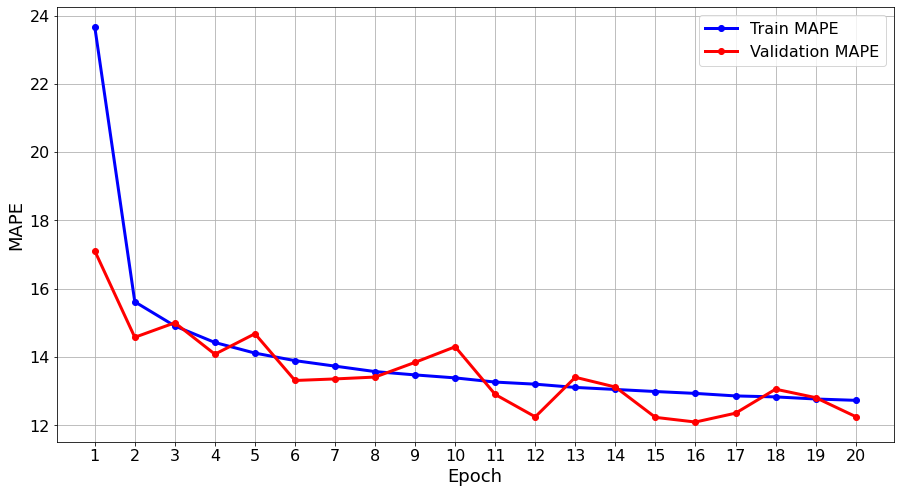

In [70]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test3a[i], MAPE_test3a[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test3a), np.average(MAPE_test3a)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test3a), np.median(MAPE_test3a)))

train_mape_average3a = []
test_mape_average3a = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out3a[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average3a.append(train_mape)

    test_mape_average_i = [history_out3a[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average3a.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average3a, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average3a, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 3b - SeLU Activation

In [71]:
i_t = 6 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

3b - Activation = SeLU


### Run Model

In [72]:
MAE_test3b = []
MAPE_test3b = []

y_test_hat_out3b = []

history_out3b = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model3b = tf.keras.Sequential()
    model3b.add(tf.keras.layers.Input((n, )))
    model3b.add(tf.keras.layers.Dense(64, activation=tf.nn.selu))
    model3b.add(tf.keras.layers.Dense(64, activation=tf.nn.selu))
    model3b.add(tf.keras.layers.Dense(64, activation=tf.nn.selu))
    model3b.add(tf.keras.layers.Dense(64, activation=tf.nn.selu))
    model3b.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model3b.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history3b = model3b.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model3b.predict(x_test, batch_size=n_batch)
    y_test_hat_out3b.append(y_test_hat)

    history_out3b.append(history3b)

    test_loss, test_accuracy = model3b.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test3b.append(test_loss)
    MAPE_test3b.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model3b.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 946us/step - loss: 0.0112 - mean_absolute_percentage_error: 37.4232 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 20.4126
Epoch 2/20
15625/15625 [==============================] - 15s 960us/step - loss: 0.0040 - mean_absolute_percentage_error: 19.0136 - val_loss: 0.0031 - val_mean_absolute_percentage_error: 16.3106
Epoch 3/20
15625/15625 [==============================] - 15s 959us/step - loss: 0.0032 - mean_absolute_percentage_error: 16.7418 - val_loss: 0.0032 - val_mean_absolute_percentage_error: 12.5755
Epoch 4/20
15625/15625 [==============================] - 15s 978us/step - loss: 0.0029 - mean_absolute_percentage_error: 15.6348 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 15.3419
Epoch 5/20
15625/15625 [==============================] - 15s 930us/step - loss: 0.002

3907/3907 [==============================] - 2s 535us/step - loss: 0.0018 - mean_absolute_percentage_error: 12.6592
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\3b - Activation = SeLU\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 14s 868us/step - loss: 0.0118 - mean_absolute_percentage_error: 40.0827 - val_loss: 0.0033 - val_mean_absolute_percentage_error: 19.0366
Epoch 2/20
15625/15625 [==============================] - 13s 861us/step - loss: 0.0041 - mean_absolute_percentage_error: 19.6473 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 14.7650
Epoch 3/20
15625/15625 [==============================] - 13s 858us/step - loss: 0.0033 - mean_absolute_percentage_error: 17.2653 - val_loss: 0.0031 - val_mean_absolute_percentage_error: 14.9

Epoch 18/20
15625/15625 [==============================] - 15s 968us/step - loss: 0.0020 - mean_absolute_percentage_error: 12.9624 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 12.0623
Epoch 19/20
15625/15625 [==============================] - 15s 960us/step - loss: 0.0020 - mean_absolute_percentage_error: 13.0397 - val_loss: 0.0035 - val_mean_absolute_percentage_error: 17.4382
Epoch 20/20
3907/3907 [==============================] - 2s 571us/step - loss: 0.0019 - mean_absolute_percentage_error: 13.8210
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\3b - Activation = SeLU\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 934us/step - loss: 0.0111 - mean_absolute_percentage_error: 38.3164 - val_loss: 0.0059 - val_mean_absolute_percenta

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.002578 	 12.283133
2 		 0.001774 	 12.659194
3 		 0.001894 	 11.399423
4 		 0.001886 	 13.821011
5 		 0.001827 	 11.599270

Mean 		 0.001992 	 12.352406
Median 		 0.001886 	 12.283133


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 26.0 		 20.57
2 		 18.32 		 16.44
3 		 16.36 		 17.87
4 		 15.5 		 15.21
5 		 15.0 		 13.63
6 		 14.6 		 13.28
7 		 14.31 		 14.94
8 		 14.13 		 15.08
9 		 13.91 		 13.81
10 		 13.78 		 15.89
11 		 13.66 		 13.65
12 		 13.55 		 12.97
13 		 13.45 		 12.4
14 		 13.39 		 12.52
15 		 13.34 		 12.31
16 		 13.27 		 14.2
17 		 13.21 		 13.42
18 		 13.15 		 12.53
19 		 13.08 		 13.66
20 		 13.03 		 12.35


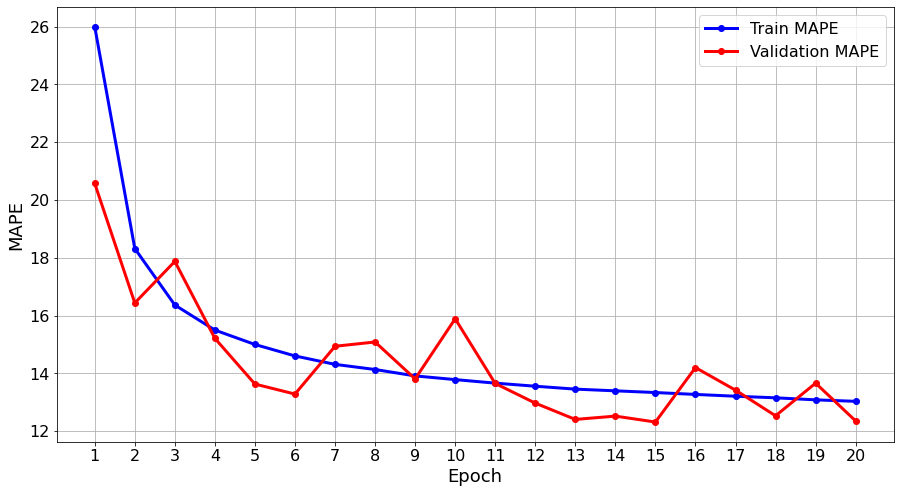

In [73]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test3b[i], MAPE_test3b[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test3b), np.average(MAPE_test3b)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test3b), np.median(MAPE_test3b)))

train_mape_average3b = []
test_mape_average3b = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out3b[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average3b.append(train_mape)

    test_mape_average_i = [history_out3b[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average3b.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average3b, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average3b, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 4a - Batch Size = 8

In [74]:
i_t = 7 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

4a - Batch Size = 8


### Run Model

In [75]:
MAE_test4a = []
MAPE_test4a = []

y_test_hat_out4a = []

history_out4a = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model4a = tf.keras.Sequential()
    model4a.add(tf.keras.layers.Input((n, )))
    model4a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4a.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 8
    model4a.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history4a = model4a.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model4a.predict(x_test, batch_size=n_batch)
    y_test_hat_out4a.append(y_test_hat)

    history_out4a.append(history4a)

    test_loss, test_accuracy = model4a.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test4a.append(test_loss)
    MAPE_test4a.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model4a.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
62500/62500 [==============================] - 55s 880us/step - loss: 0.0069 - mean_absolute_percentage_error: 28.1701 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 15.5773
Epoch 2/20
62500/62500 [==============================] - 52s 833us/step - loss: 0.0025 - mean_absolute_percentage_error: 15.1431 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 14.0233
Epoch 3/20
62500/62500 [==============================] - 51s 824us/step - loss: 0.0022 - mean_absolute_percentage_error: 14.4941 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 13.6065
Epoch 4/20
62500/62500 [==============================] - 52s 835us/step - loss: 0.0021 - mean_absolute_percentage_error: 14.2132 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 12.2411
Epoch 5/20
62500/62500 [==============================] - 51s 818us/step - loss: 0.002

15625/15625 [==============================] - 7s 466us/step - loss: 0.0015 - mean_absolute_percentage_error: 12.5020
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\4a - Batch Size = 8\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
62500/62500 [==============================] - 48s 755us/step - loss: 0.0071 - mean_absolute_percentage_error: 29.5258 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 18.5064
Epoch 2/20
62500/62500 [==============================] - 47s 753us/step - loss: 0.0025 - mean_absolute_percentage_error: 15.2808 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 13.1705
Epoch 3/20
62500/62500 [==============================] - 47s 753us/step - loss: 0.0023 - mean_absolute_percentage_error: 14.3441 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 15.12

Epoch 18/20
62500/62500 [==============================] - 52s 828us/step - loss: 0.0017 - mean_absolute_percentage_error: 12.7494 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 12.0269
Epoch 19/20
62500/62500 [==============================] - 50s 804us/step - loss: 0.0017 - mean_absolute_percentage_error: 12.7368 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 13.7259
Epoch 20/20
15625/15625 [==============================] - 8s 506us/step - loss: 0.0017 - mean_absolute_percentage_error: 12.1217
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\4a - Batch Size = 8\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
62500/62500 [==============================] - 49s 777us/step - loss: 0.0073 - mean_absolute_percentage_error: 31.3039 - val_loss: 0.0024 - val_mean_absolute_percentag

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001715 	 13.040068
2 		 0.001517 	 12.501982
3 		 0.001563 	 12.354272
4 		 0.001669 	 12.121674
5 		 0.001686 	 12.940969

Mean 		 0.001630 	 12.591793
Median 		 0.001669 	 12.501982


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 18.82 		 16.14
2 		 15.13 		 14.22
3 		 14.51 		 14.12
4 		 14.14 		 14.04
5 		 13.86 		 14.57
6 		 13.69 		 16.0
7 		 13.54 		 14.57
8 		 13.41 		 12.89
9 		 13.27 		 12.82
10 		 13.16 		 12.97
11 		 13.08 		 13.0
12 		 13.01 		 13.22
13 		 12.93 		 12.96
14 		 12.85 		 12.94
15 		 12.8 		 12.03
16 		 12.78 		 13.12
17 		 12.71 		 12.71
18 		 12.67 		 12.71
19 		 12.64 		 13.53
20 		 12.6 		 12.59


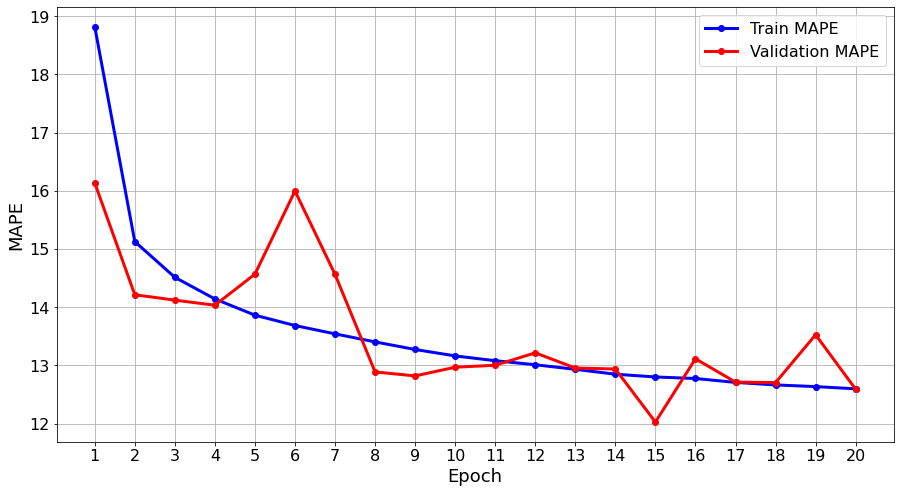

In [76]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test4a[i], MAPE_test4a[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test4a), np.average(MAPE_test4a)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test4a), np.median(MAPE_test4a)))

train_mape_average4a = []
test_mape_average4a = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out4a[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average4a.append(train_mape)

    test_mape_average_i = [history_out4a[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average4a.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average4a, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average4a, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 4b - Batch Size = 64

In [77]:
i_t = 8 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

4b - Batch Size = 64


### Run Model

In [78]:
MAE_test4b = []
MAPE_test4b = []

y_test_hat_out4b = []

history_out4b = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model4b = tf.keras.Sequential()
    model4b.add(tf.keras.layers.Input((n, )))
    model4b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model4b.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 64
    model4b.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history4b = model4b.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model4b.predict(x_test, batch_size=n_batch)
    y_test_hat_out4b.append(y_test_hat)

    history_out4b.append(history4b)

    test_loss, test_accuracy = model4b.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test4b.append(test_loss)
    MAPE_test4b.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model4b.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
7813/7813 [==============================] - 9s 1ms/step - loss: 0.0179 - mean_absolute_percentage_error: 70.9727 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 20.0648
Epoch 2/20
7813/7813 [==============================] - 8s 1ms/step - loss: 0.0029 - mean_absolute_percentage_error: 17.4599 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 17.2691
Epoch 3/20
7813/7813 [==============================] - 7s 922us/step - loss: 0.0025 - mean_absolute_percentage_error: 16.2110 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 13.1762
Epoch 4/20
7813/7813 [==============================] - 9s 1ms/step - loss: 0.0023 - mean_absolute_percentage_error: 15.3418 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 12.4807
Epoch 5/20
7813/7813 [==============================] - 8s 1ms/step - loss: 0.0022 - mean_absolute_perce

1954/1954 [==============================] - 1s 570us/step - loss: 0.0014 - mean_absolute_percentage_error: 12.3658
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\4b - Batch Size = 64\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
7813/7813 [==============================] - 8s 1ms/step - loss: 0.0177 - mean_absolute_percentage_error: 72.0288 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 18.3136
Epoch 2/20
7813/7813 [==============================] - 8s 964us/step - loss: 0.0028 - mean_absolute_percentage_error: 17.2375 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 16.3732
Epoch 3/20
7813/7813 [==============================] - 8s 1ms/step - loss: 0.0025 - mean_absolute_percentage_error: 16.0423 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 17.4644
Epoch 4/20


7813/7813 [==============================] - 8s 1ms/step - loss: 0.0017 - mean_absolute_percentage_error: 12.5597 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 12.5484
Epoch 20/20
1954/1954 [==============================] - 1s 621us/step - loss: 0.0016 - mean_absolute_percentage_error: 12.3293
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\4b - Batch Size = 64\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
7813/7813 [==============================] - 9s 1ms/step - loss: 0.0185 - mean_absolute_percentage_error: 81.5309 - val_loss: 0.0042 - val_mean_absolute_percentage_error: 17.2636
Epoch 2/20
7813/7813 [==============================] - 8s 1ms/step - loss: 0.0029 - mean_absolute_percentage_error: 17.5184 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 15.4999
Epoch 3/20
7

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001492 	 11.076643
2 		 0.001439 	 12.365832
3 		 0.001593 	 12.730349
4 		 0.001579 	 12.329282
5 		 0.001528 	 12.407788

Mean 		 0.001526 	 12.181979
Median 		 0.001528 	 12.365832


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 30.41 		 18.17
2 		 16.9 		 16.49
3 		 15.76 		 15.31
4 		 15.15 		 14.29
5 		 14.71 		 14.33
6 		 14.31 		 14.31
7 		 13.99 		 14.92
8 		 13.73 		 13.52
9 		 13.53 		 13.18
10 		 13.36 		 14.95
11 		 13.22 		 13.08
12 		 13.09 		 13.9
13 		 12.97 		 12.97
14 		 12.87 		 13.4
15 		 12.77 		 12.83
16 		 12.68 		 12.78
17 		 12.61 		 13.06
18 		 12.53 		 12.71
19 		 12.46 		 12.97
20 		 12.41 		 12.18


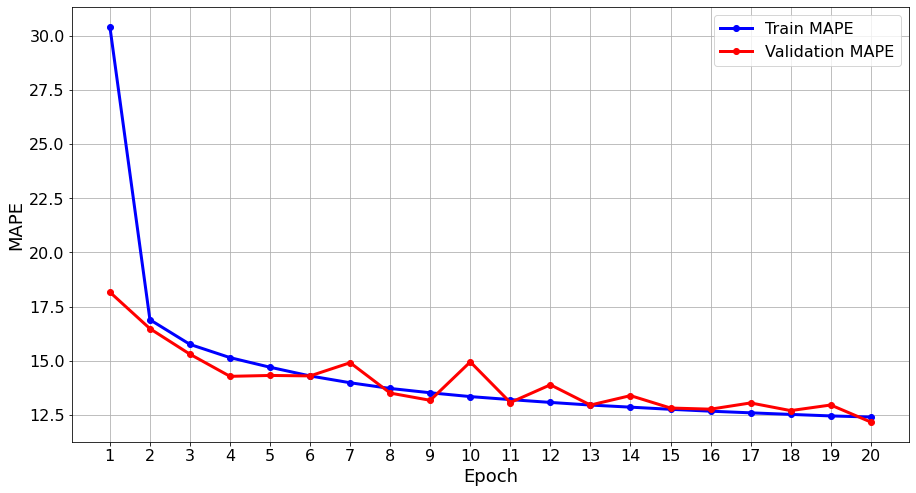

In [79]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test4b[i], MAPE_test4b[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test4b), np.average(MAPE_test4b)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test4b), np.median(MAPE_test4b)))

train_mape_average4b = []
test_mape_average4b = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out4b[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average4b.append(train_mape)

    test_mape_average_i = [history_out4b[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average4b.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average4b, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average4b, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 5a - RMSProp Optimizer

In [80]:
i_t = 9 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

5a - Optimizer = RMSProp


### Run Model

In [81]:
MAE_test5a = []
MAPE_test5a = []

y_test_hat_out5a = []

history_out5a = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model5a = tf.keras.Sequential()
    model5a.add(tf.keras.layers.Input((n, )))
    model5a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5a.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5a.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model5a.compile(optimizer='RMSprop', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history5a = model5a.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model5a.predict(x_test, batch_size=n_batch)
    y_test_hat_out5a.append(y_test_hat)

    history_out5a.append(history5a)

    test_loss, test_accuracy = model5a.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test5a.append(test_loss)
    MAPE_test5a.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model5a.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 895us/step - loss: 0.0128 - mean_absolute_percentage_error: 42.4102 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 19.5580
Epoch 2/20
15625/15625 [==============================] - 15s 980us/step - loss: 0.0038 - mean_absolute_percentage_error: 17.3994 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 19.2339
Epoch 3/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0031 - mean_absolute_percentage_error: 16.0517 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 13.6556
Epoch 4/20
15625/15625 [==============================] - 15s 948us/step - loss: 0.0028 - mean_absolute_percentage_error: 15.2664 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 17.7512
Epoch 5/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0026 - 

3907/3907 [==============================] - 2s 481us/step - loss: 0.0019 - mean_absolute_percentage_error: 13.2985
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\5a - Optimizer = RMSProp\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 13s 763us/step - loss: 0.0129 - mean_absolute_percentage_error: 41.7842 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 18.0156
Epoch 2/20
15625/15625 [==============================] - 12s 751us/step - loss: 0.0036 - mean_absolute_percentage_error: 17.1455 - val_loss: 0.0036 - val_mean_absolute_percentage_error: 15.6408
Epoch 3/20
15625/15625 [==============================] - 12s 750us/step - loss: 0.0030 - mean_absolute_percentage_error: 15.6971 - val_loss: 0.0030 - val_mean_absolute_percentage_error: 14

Epoch 18/20
15625/15625 [==============================] - 13s 858us/step - loss: 0.0020 - mean_absolute_percentage_error: 13.2476 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 12.3896
Epoch 19/20
15625/15625 [==============================] - 14s 879us/step - loss: 0.0020 - mean_absolute_percentage_error: 13.2248 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 14.6378
Epoch 20/20
3907/3907 [==============================] - 2s 509us/step - loss: 0.0019 - mean_absolute_percentage_error: 13.3442
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\5a - Optimizer = RMSProp\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 13s 823us/step - loss: 0.0132 - mean_absolute_percentage_error: 43.4476 - val_loss: 0.0032 - val_mean_absolute_percen

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001864 	 12.191114
2 		 0.001949 	 13.298500
3 		 0.002336 	 12.417567
4 		 0.001897 	 13.344201
5 		 0.001983 	 13.942152

Mean 		 0.002006 	 13.038707
Median 		 0.001949 	 13.298500


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 23.92 		 17.59
2 		 16.76 		 16.72
3 		 15.7 		 15.39
4 		 15.15 		 14.69
5 		 14.77 		 13.99
6 		 14.52 		 14.23
7 		 14.3 		 14.4
8 		 14.16 		 14.51
9 		 14.05 		 13.54
10 		 13.91 		 13.6
11 		 13.8 		 13.75
12 		 13.71 		 13.69
13 		 13.62 		 15.2
14 		 13.54 		 13.8
15 		 13.45 		 14.18
16 		 13.41 		 13.66
17 		 13.34 		 12.72
18 		 13.27 		 13.58
19 		 13.23 		 13.63
20 		 13.2 		 13.04


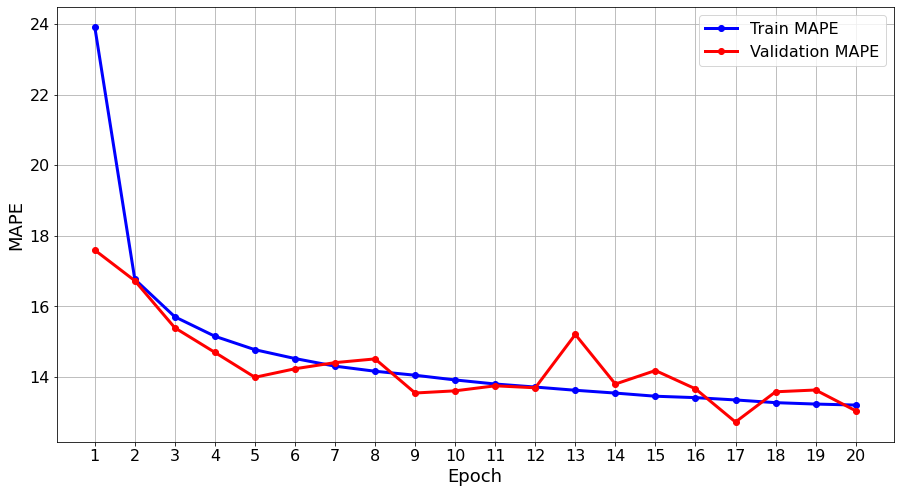

In [82]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test5a[i], MAPE_test5a[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test5a), np.average(MAPE_test5a)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test5a), np.median(MAPE_test5a)))

train_mape_average5a = []
test_mape_average5a = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out5a[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average5a.append(train_mape)

    test_mape_average_i = [history_out5a[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average5a.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average5a, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average5a, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Scenario 5b - NADAM Optimizer

In [84]:
i_t = 10 # index of current test
out_subsubpath = tests[i_t]
print(out_subsubpath)

5b - Optimizer = NADAM


### Run Model

In [85]:
MAE_test5b = []
MAPE_test5b = []

y_test_hat_out5b = []

history_out5b = []

for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model5b = tf.keras.Sequential()
    model5b.add(tf.keras.layers.Input((n, )))
    model5b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5b.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model5b.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 32
    model5b.compile(optimizer='Nadam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history5b = model5b.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model5b.predict(x_test, batch_size=n_batch)
    y_test_hat_out5b.append(y_test_hat)

    history_out5b.append(history5b)

    test_loss, test_accuracy = model5b.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test5b.append(test_loss)
    MAPE_test5b.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_subsubpath, out_file)
    model5b.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 17s 997us/step - loss: 0.0118 - mean_absolute_percentage_error: 45.3268 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 15.5385
Epoch 2/20
15625/15625 [==============================] - 16s 1ms/step - loss: 0.0023 - mean_absolute_percentage_error: 15.4511 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 14.4961
Epoch 3/20
15625/15625 [==============================] - 14s 914us/step - loss: 0.0020 - mean_absolute_percentage_error: 14.2529 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 13.6483
Epoch 4/20
15625/15625 [==============================] - 14s 904us/step - loss: 0.0019 - mean_absolute_percentage_error: 13.7385 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 13.5137
Epoch 5/20
15625/15625 [==============================] - 14s 906us/step - loss: 0.0018 

3907/3907 [==============================] - 2s 488us/step - loss: 0.0015 - mean_absolute_percentage_error: 11.1685
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\5b - Optimizer = NADAM\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 881us/step - loss: 0.0125 - mean_absolute_percentage_error: 46.5773 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 17.2155
Epoch 2/20
15625/15625 [==============================] - 13s 835us/step - loss: 0.0024 - mean_absolute_percentage_error: 15.2552 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 12.9844
Epoch 3/20
15625/15625 [==============================] - 13s 832us/step - loss: 0.0021 - mean_absolute_percentage_error: 14.4402 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 14.7

Epoch 18/20
15625/15625 [==============================] - 13s 850us/step - loss: 0.0015 - mean_absolute_percentage_error: 12.0092 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 13.4587
Epoch 19/20
15625/15625 [==============================] - 13s 849us/step - loss: 0.0015 - mean_absolute_percentage_error: 12.1738 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 10.6587
Epoch 20/20
3907/3907 [==============================] - 2s 492us/step - loss: 0.0015 - mean_absolute_percentage_error: 10.8664
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\5b - Optimizer = NADAM\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
15625/15625 [==============================] - 15s 868us/step - loss: 0.0124 - mean_absolute_percentage_error: 47.8473 - val_loss: 0.0033 - val_mean_absolute_percenta

### Output Results

Final Test MA/MAPE
------------------------------
K 		 MAE 		 MAPE
1 		 0.001361 	 11.496572
2 		 0.001453 	 11.168484
3 		 0.001567 	 12.742832
4 		 0.001492 	 10.866411
5 		 0.001411 	 10.619791

Mean 		 0.001457 	 11.378818
Median 		 0.001453 	 11.168484


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 22.73 		 16.79
2 		 15.06 		 14.1
3 		 14.17 		 14.12
4 		 13.7 		 13.43
5 		 13.38 		 13.14
6 		 13.14 		 12.9
7 		 12.94 		 12.88
8 		 12.8 		 12.8
9 		 12.68 		 11.96
10 		 12.57 		 12.37
11 		 12.49 		 12.29
12 		 12.41 		 11.87
13 		 12.35 		 12.24
14 		 12.26 		 12.17
15 		 12.23 		 12.24
16 		 12.17 		 11.62
17 		 12.12 		 11.8
18 		 12.08 		 12.05
19 		 12.03 		 12.35
20 		 11.98 		 11.38


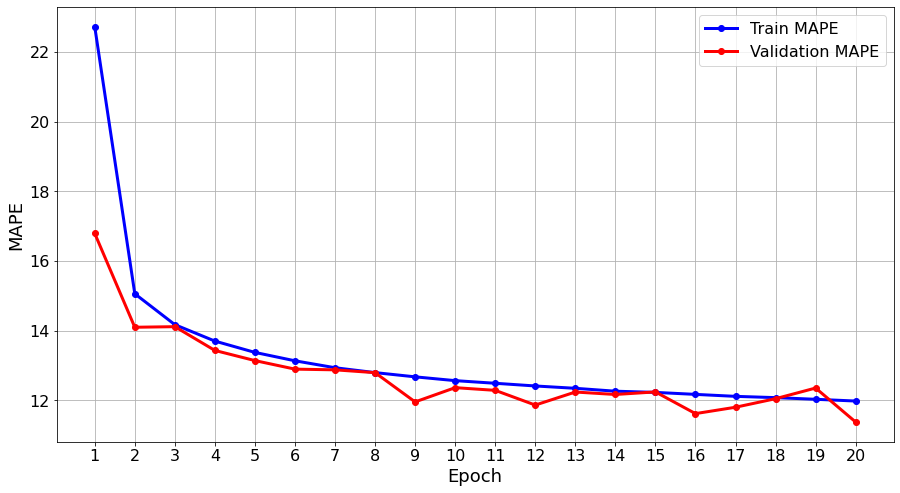

In [86]:
# PRINT FINAL K-FOLD TEST MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t MAE \t\t MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f}".format(i + 1, MAE_test5b[i], MAPE_test5b[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f}".format("Mean", np.average(MAE_test5b), np.average(MAPE_test5b)))
print("{0} \t\t {1:.6f} \t {2:.6f}".format("Median", np.median(MAE_test5b), np.median(MAPE_test5b)))

train_mape_average5b = []
test_mape_average5b = []

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\n\nAverage Train/Test MAPE")
print("------------------------------")

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out5b[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average5b.append(train_mape)

    test_mape_average_i = [history_out5b[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average5b.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average5b, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average5b, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()